## Entrenamiento del modelo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 24.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
%pip install transformers[torch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [ ]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/Datos/train_data.csv")  # Primera base de datos
test = pd.read_csv("/content/drive/MyDrive/Datos/test_data.csv")  # Primera base de datos
print(train["categoria"].value_counts())

categoria
neutral     10225
positivo    10168
negativo    10122
Name: count, dtype: int64


## Tokenizar con Transformers

In [ ]:
from datasets import Dataset
from transformers import AutoTokenizer
from sklearn.preprocessing import LabelEncoder

# Tokenizer en inglés
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Convertir tus pandas DataFrames a datasets de HuggingFace
train_dataset = Dataset.from_pandas(train)
test_dataset = Dataset.from_pandas(test)

# Entrenar el LabelEncoder SOLO con el set de entrenamiento
label_encoder = LabelEncoder()
label_encoder.fit(train['categoria'])  # Usar solo las categorías del set de entrenamiento

# Mapear las etiquetas al formato numérico
train_dataset = train_dataset.map(lambda x: {'labels': label_encoder.transform([x['categoria']])[0]})
test_dataset = test_dataset.map(lambda x: {'labels': label_encoder.transform([x['categoria']])[0]})

# Tokenización por lotes
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Verifica que las clases se codificaron correctamente
print("Clases codificadas:", label_encoder.classes_)




Map:   0%|          | 0/30515 [00:00<?, ? examples/s]

Map:   0%|          | 0/7629 [00:00<?, ? examples/s]

Map:   0%|          | 0/30515 [00:00<?, ? examples/s]

Map:   0%|          | 0/7629 [00:00<?, ? examples/s]

Clases codificadas: ['negativo' 'neutral' 'positivo']


In [ ]:
train_dataset[2]['labels']

1

In [ ]:
# TODO: Imprime el texto y los tokens de la primera muestra de train
print(f"Text: {train_dataset [0]['text']}\n")
print(f"Tokens: {train_dataset [0]['input_ids']}")

Text: Let me be forthright -- I recently bought the Canon Rebel XT SLR to take pictures of my two month old daughter. I wanted those warm and fuzzy candid shots of her (you know, like the ones they have in those parenting magazines). After fiddling with the settings on the camera and taking tons of pictures, I noticed they were an improvement over my old point-and-shoot camera. However, not enough to justify the big $$$ I spent on the Rebel and the fancy lens. A beginners guide on SLR cameras was definitely in order.After skimming over the first few chapters of this book, I decided to buy it. After all, I've had good experiences with other books in the "Dummy" series in the past. Once I digged deeper into the book, though, I discovered the book was no help for me at all! For example, the author spends an considerable amount of time writing about the benefits of SLR cameras over point-and-shoot cameras, how to pick the best SLR camera, and the difference between memory storage devices. 

In [ ]:
sample = train_dataset[0]['categoria']
print(sample)  # Debe incluir una clave 'labels' o 'categoria' que luego se transforma a 'labels'



negativo


## Importar modelo

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = len(set(train_dataset["categoria"]))

model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
%pip install evaluate


In [5]:
import numpy as np
import evaluate
from sklearn.metrics import accuracy_score


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    acc = accuracy_score(labels, predictions)
    return {'eval_accuracy': acc}



ModuleNotFoundError: No module named 'evaluate'

In [ ]:
print(compute_metrics((np.array([[0.1, 0.9], [0.8, 0.2]]), np.array([1, 0]))))

{'eval_accuracy': 1.0}


In [ ]:
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback

def train_model(num_epochs, batch_size, model, train_dataset, test_dataset, tokenizer, compute_metrics):
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=num_epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        eval_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="eval_accuracy",
        greater_is_better=True,
        logging_steps=1000,
        save_total_limit=3,
        label_names=["labels"]
    )

    early_stopping = EarlyStoppingCallback(
        early_stopping_patience=2,
        early_stopping_threshold=0.0
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
        callbacks=[early_stopping]
    )

    trainer.train()
    return trainer


In [ ]:
# from transformers import Trainer, TrainingArguments
# from transformers import EarlyStoppingCallback


# training_args = TrainingArguments(
#     output_dir='./results',
#     num_train_epochs=3,
#     per_device_train_batch_size=32,
#     per_device_eval_batch_size=32,
#     eval_strategy="epoch",
#     save_strategy="epoch",
#     load_best_model_at_end=True,
#     metric_for_best_model="eval_accuracy",  # Matches the key in compute_metrics
#     greater_is_better=True,
#     logging_steps=10,
#     save_total_limit=3,
#     label_names=["labels"]
# )


In [ ]:
# from transformers import Trainer

# early_stopping = EarlyStoppingCallback(
#     early_stopping_patience=2,  # Número de épocas sin mejora para detener el entrenamiento
#     early_stopping_threshold=0.0  # Umbral mínimo de mejora para considerar "mejora"
# )

# trainer = Trainer(
#     model=model,  # Tu modelo previamente cargado
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=test_dataset,
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics,  # Pasar la función de métricas
#     callbacks=[early_stopping]  # Agregar el callback de early stopping
# )

<ipython-input-69-3f484577d032>:8: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer = train_model(
    num_epochs=3,
    batch_size=32,
    model=model,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


In [ ]:
eval_results = trainer.evaluate()
print(eval_results)

{'eval_accuracy': 0.7614366234106699, 'eval_loss': 0.6095182299613953, 'eval_model_preparation_time': 0.0015, 'eval_runtime': 55.837, 'eval_samples_per_second': 136.63, 'eval_steps_per_second': 4.28, 'epoch': 3.0}


## Estudio resultados: Matriz de confusión

In [ ]:
predictions = trainer.predict(test_dataset)

logits = predictions.predictions       # (num_samples, num_clases)
y_true = predictions.label_ids         # etiquetas reales


In [ ]:
import numpy as np

y_pred = np.argmax(logits, axis=1)


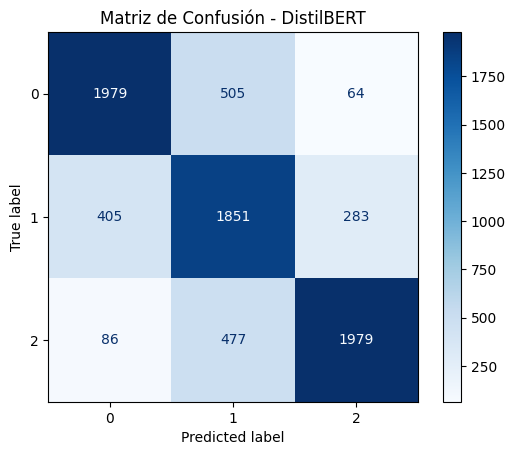

In [ ]:
predictions = trainer.predict(test_dataset)

logits = predictions.predictions       # (num_samples, num_clases)
y_true = predictions.label_ids


## Estudio de los resultados: Curva ROC



In [ ]:
import numpy as np
import torch
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from torch.nn.functional import softmax
import matplotlib.pyplot as plt

def plot_multiclass_roc(trainer, test_dataset, titulo='Curvas ROC por clase'):
    # Obtener predicciones
    predictions = trainer.predict(test_dataset)
    logits = predictions.predictions
    y_true = predictions.label_ids

    # Número de clases
    n_classes = logits.shape[1]

    # Convertir logits a probabilidades
    probs = softmax(torch.tensor(logits), dim=1).numpy()

    # Binarizar etiquetas verdaderas (one-hot)
    y_bin = label_binarize(y_true, classes=list(range(n_classes)))

    # Graficar curvas ROC por clase
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Clase {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea aleatoria
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(titulo)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


In [ ]:
# predictions = trainer.predict(test_dataset)

# logits = predictions.predictions        # forma: (num_samples, num_clases)
# y_true = predictions.label_ids          # forma: (num_samples,)

In [ ]:
# import torch
# from sklearn.preprocessing import label_binarize
# from torch.nn.functional import softmax
# import numpy as np

# # Número de clases
# n_classes = logits.shape[1]

# # Convertimos logits a probabilidades
# probs = softmax(torch.tensor(logits), dim=1).numpy()

# # Binarizamos las etiquetas (one-hot) → necesario para multiclase ROC
# y_bin = label_binarize(y_true, classes=list(range(n_classes)))


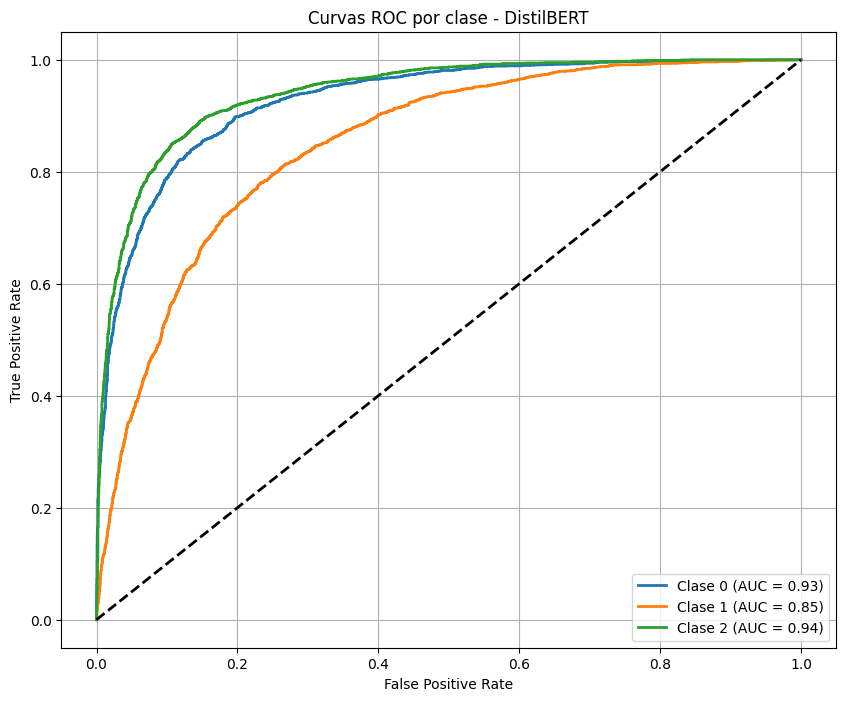

In [ ]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))

# for i in range(n_classes):
#     fpr, tpr, _ = roc_curve(y_bin[:, i], probs[:, i])
#     roc_auc = auc(fpr, tpr)

#     plt.plot(fpr, tpr, lw=2, label=f'Clase {i} (AUC = {roc_auc:.2f})')

# # Línea base (modelo aleatorio)
# plt.plot([0, 1], [0, 1], 'k--', lw=2)

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Curvas ROC por clase - DistilBERT')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()


In [ ]:
plot_multiclass_roc(trainer, test_dataset, titulo='ROC - Modelo DistilBERT')

## Entrenamiento más exhaustivo con 10 epochs

In [ ]:
from transformers import Trainer, TrainingArguments
from transformers import EarlyStoppingCallback


training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy",  # Matches the key in compute_metrics
    greater_is_better=True,
    logging_steps=1000,
    save_total_limit=3,
    label_names=["labels"]
)


In [ ]:
from transformers import Trainer

early_stopping = EarlyStoppingCallback(
    early_stopping_patience=2,  # Número de épocas sin mejora para detener el entrenamiento
    early_stopping_threshold=0.0  # Umbral mínimo de mejora para considerar "mejora"
)

trainer = Trainer(
    model=model,  # Tu modelo previamente cargado
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # Pasar la función de métricas
    callbacks=[early_stopping]  # Agregar el callback de early stopping
)

<ipython-input-90-3f484577d032>:8: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
eval_results = trainer.evaluate()
print(eval_results)

KeyboardInterrupt: 

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Model Preparation Time
1,No log,1.908994,0.742299,0.001600
2,0.050300,2.002954,0.743086,0.001600
3,0.041300,2.005048,0.742692,0.001600
4,0.024300,2.155220,0.745314,0.001600
5,0.012000,2.216248,0.744790,0.001600


TrainOutput(global_step=4770, training_loss=0.027793277584531772, metrics={'train_runtime': 3170.374, 'train_samples_per_second': 48.125, 'train_steps_per_second': 1.505, 'total_flos': 2.02115737882368e+16, 'train_loss': 0.027793277584531772, 'epoch': 5.0})

In [ ]:
eval_results = trainer.evaluate()
print(eval_results)

{'eval_accuracy': 0.7453139336741381, 'eval_loss': 2.1552202701568604, 'eval_model_preparation_time': 0.0016, 'eval_runtime': 55.6737, 'eval_samples_per_second': 137.031, 'eval_steps_per_second': 4.293, 'epoch': 5.0}


In [2]:
predictions = trainer.predict(test_dataset)

logits = predictions.predictions       # (num_samples, num_clases)
y_true = predictions.label_ids         # etiquetas reales


NameError: name 'trainer' is not defined

In [3]:
import numpy as np

y_pred = np.argmax(logits, axis=1)


NameError: name 'logits' is not defined

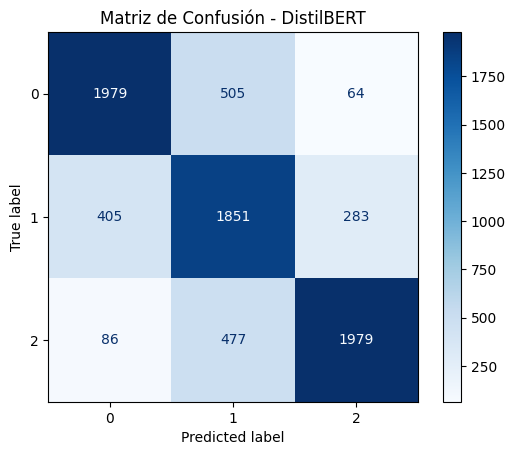

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular la matriz
cm = confusion_matrix(y_true, y_pred)

# Mostrarla gráficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - DistilBERT")
plt.grid(False)
plt.show()
